In [ ]:
import pandas as pd
import numpy as np

covid = pd.read_excel('Korea_COVID19_20210226.xlsx')

In [111]:
covid

,Date,AccuConfirm,AccuRecover,NewConfirm,AccuValidConf,WeekMean
0,2020-02-15,29,9,NaN,20,NaN
1,2020-02-16,30,10,1.0,20,NaN
2,2020-02-17,31,12,1.0,19,NaN
3,2020-02-18,51,16,20.0,35,NaN
4,2020-02-19,104,16,53.0,88,NaN
...,...,...,...,...,...,...
373,2021-02-22,87680,78394,356.0,9286,479.285714
374,2021-02-23,88120,79050,440.0,9070,453.428571
375,2021-02-24,88516,79487,396.0,9029,421.285714
376,2021-02-25,88922,79880,406.0,9042,399.142857


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 377 artists>

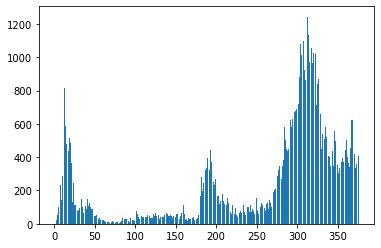

In [46]:
# 일일 확진자 막대 그래프
plt.bar(covid.NewConfirm.index, covid.NewConfirm)

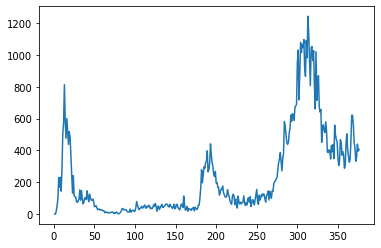

In [45]:
# 일일 확진자 선 그래프
plt.plot(covid.NewConfirm.index, covid.NewConfirm)

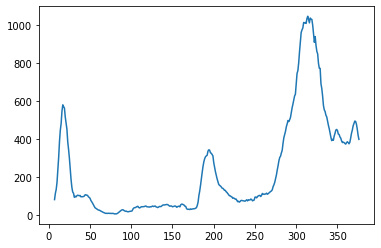

In [44]:
# 7일 평균 확진자 (그래프가 선명해짐)
plt.plot(covid.WeekMean.index, covid.WeekMean)

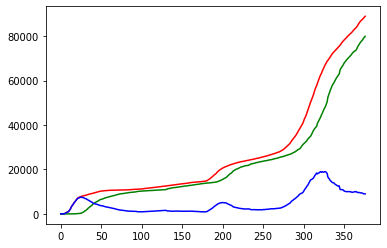

In [43]:
# 누적확진자, 누적격리해제, 실질확진자 선 그래프
plt.plot(covid.AccuConfirm.index, covid.AccuConfirm, color='red')
plt.plot(covid.AccuRecover.index, covid.AccuRecover, color='green')
plt.plot(covid.AccuValidConf.index, covid.AccuValidConf, color='blue')
plt.show()

In [112]:
sun = []
mon = []
tue = []
wed = []
thu = []
fri = []
sat = []

In [113]:
# 일주일 별로 확진자 수 차이

for i in covid.Date.index:
    if (i % 7 == 0):
        sat.append(covid.NewConfirm[i])
    if (i % 7 == 1):
        sun.append(covid.NewConfirm[i])
    if (i % 7 == 2):
        mon.append(covid.NewConfirm[i])
    if (i % 7 == 3):
        tue.append(covid.NewConfirm[i])
    if (i % 7 == 4):
        wed.append(covid.NewConfirm[i])
    if (i % 7 == 5):
        thu.append(covid.NewConfirm[i])
    if (i % 7 == 6):
        fri.append(covid.NewConfirm[i])

In [115]:
# 데이터프레임화
df = pd.DataFrame({
    'sun': sun,
    'mon': mon,
    'tue': tue,
    'wed': wed,
    'thu': thu,
    'fri': fri,
    'sat': sat
})

In [121]:
df = df.fillna(0)
df.head()

,sun,mon,tue,wed,thu,fri,sat
0,1.0,1.0,20.0,53.0,100.0,229.0,0.0
1,231.0,144.0,284.0,505.0,571.0,813.0,169.0
2,476.0,600.0,516.0,438.0,518.0,483.0,586.0
3,248.0,131.0,242.0,114.0,110.0,107.0,367.0
4,74.0,84.0,93.0,152.0,87.0,147.0,76.0


In [147]:
df2 = (
    df
    .stack()
    .reset_index()
    .rename(columns={
        'level_0':'num',
        'level_1':'day',
        0: 'NewConfirm'
    })
)

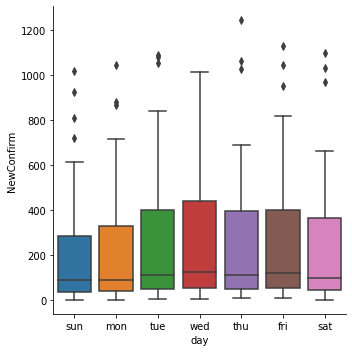

In [148]:
# 요일별 확진자 수를 catplot으로나타내기
# 수요일에 확진자 수가 많은 것으로 보임
sns.catplot(x='day', y='NewConfirm', data=df2, kind='box')